# DBSCAN en Google Colab con Animación (GIF)
Este notebook muestra cómo aplicar DBSCAN y visualizar la animación de clustering como GIF, ideal para Google Colab.

In [6]:
!pip install scikit-learn matplotlib numpy pillow

## Introducción rápida
DBSCAN es un algoritmo de clustering basado en densidad, ideal para encontrar grupos de puntos con formas arbitrarias y para identificar ruido (outliers).

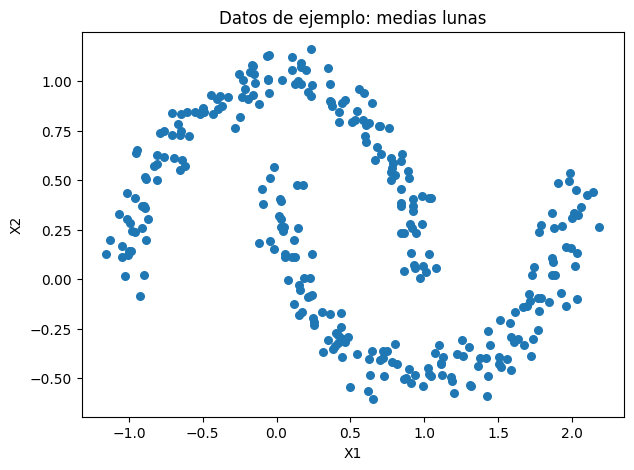

In [7]:
# 1. Generar datos de ejemplo (medias lunas)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=300, noise=0.07, random_state=42)

plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Datos de ejemplo: medias lunas")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [17]:
# 2. Aplicar DBSCAN
from sklearn.cluster import DBSCAN

eps = 0.2         # Radio de vecindad
min_samples = 5   # Puntos mínimos para ser un core point

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

print(f"Clusters encontrados: {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"Puntos de ruido: {sum(labels == -1)}")

Clusters encontrados: 2
Puntos de ruido: 0


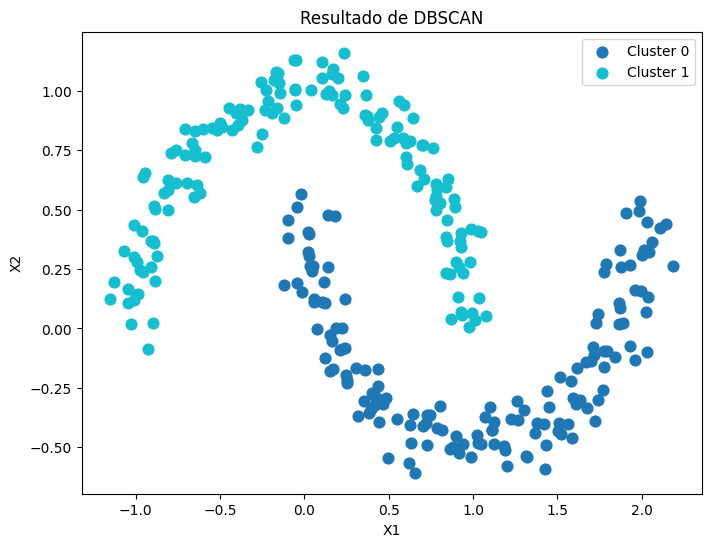

In [18]:
# 3. Visualizar clusters y ruido
unique_labels = set(labels)
colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    if k == -1:
        plt.scatter(xy[:, 0], xy[:, 1], c='k', marker='x', label='Ruido')
    else:
        plt.scatter(xy[:, 0], xy[:, 1], color=col, s=60, label=f'Cluster {k}')
plt.title("Resultado de DBSCAN")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

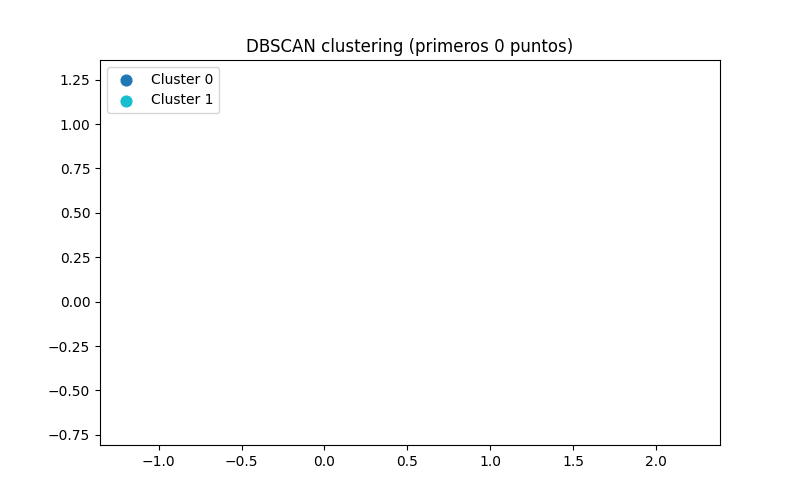

In [10]:
# 4. Animación: DBSCAN en GIF para Colab
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(8, 5))

def animate(i):
    ax.clear()
    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        if k == -1:
            ax.scatter(xy[:, 0], xy[:, 1], c='k', marker='x', label='Ruido')
        else:
            ax.scatter(xy[:i, 0], xy[:i, 1], color=col, label=f'Cluster {k}', s=60)
    ax.set_xlim(X[:,0].min()-0.2, X[:,0].max()+0.2)
    ax.set_ylim(X[:,1].min()-0.2, X[:,1].max()+0.2)
    ax.set_title(f'DBSCAN clustering (primeros {i} puntos)')
    ax.legend(loc='upper left')

ani = FuncAnimation(fig, animate, frames=len(X)+1, interval=30, repeat=False)
ani.save('dbscan_anim.gif', writer=PillowWriter(fps=30))
plt.close(fig)
display(Image(filename='dbscan_anim.gif'))

## Experimenta
- Cambia los valores de `eps` y `min_samples` para ver cómo afecta el resultado.
- Prueba con otros conjuntos de datos, como `make_blobs`.
- Agrega el k-distance plot si quieres ajustar eps de forma más precisa.
